# Tools Prepration

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# Importing models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import evaluation libareries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
#from sklearn.metrics import plot_roc_curve

In [ ]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')
df.shape

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [16]:
df['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

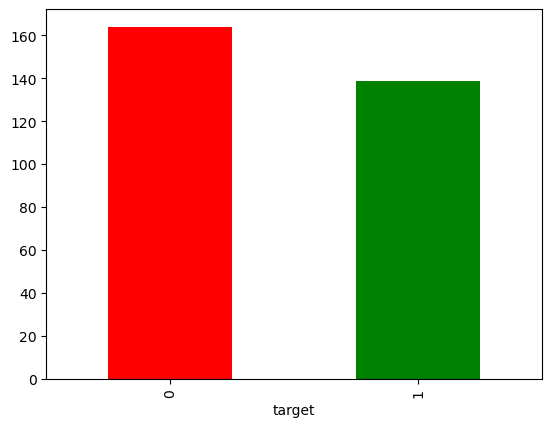

In [21]:
df['target'].value_counts().plot(kind='bar',color=['red','green']);

In [23]:
df.isna().sum()  # Are there any missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [25]:
df['sex'].value_counts()

sex
1    206
0     97
Name: count, dtype: int64

In [26]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,72,92
1,25,114


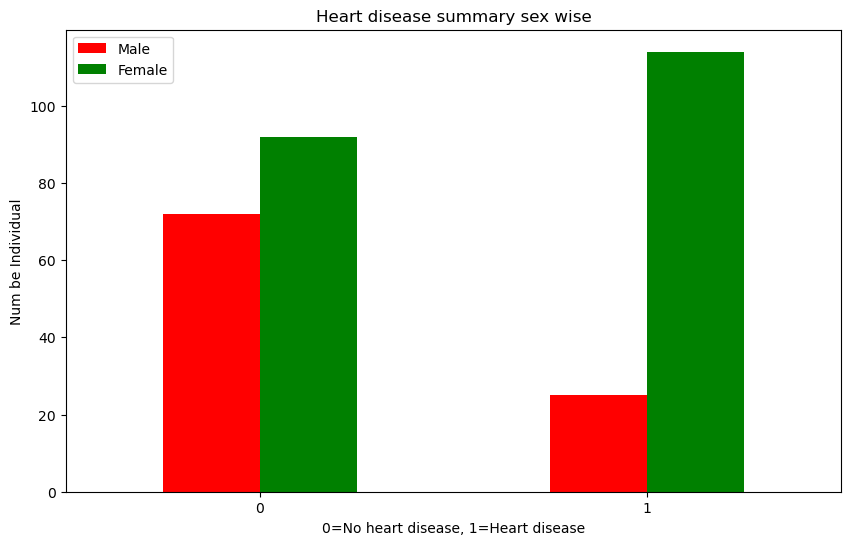

In [36]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['red','green'])
plt.title("Heart disease summary sex wise")
plt.xlabel("0=No heart disease, 1=Heart disease")
plt.ylabel("Num be Individual")
plt.legend(["Male","Female"])
plt.xticks(rotation=0);

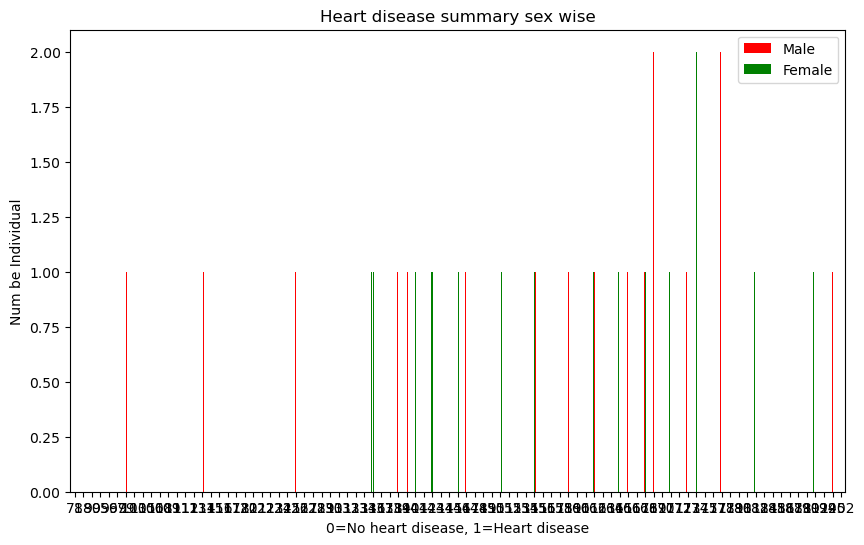

In [ ]:

pd.crosstab(df.thalach,df.age).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['red','green'])
plt.title("Heart disease summary sex wise")
plt.xlabel("0=No heart disease, 1=Heart disease")
plt.ylabel("Num be Individual")
plt.legend(["Male","Female"])
plt.xticks(rotation=0);

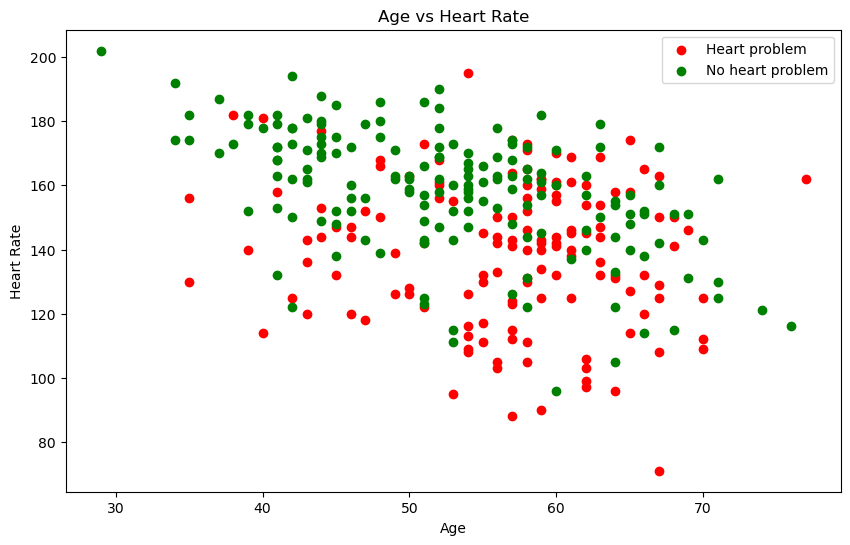

In [12]:
# Finding pattern in data using scatter plot
plt.figure(figsize=(10,6))
# Create plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green')
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['Heart problem','No heart problem']);

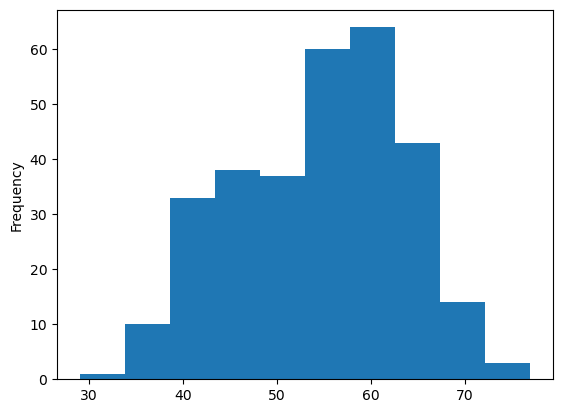

In [13]:
# Create Histogram to see age distribution
df.age.plot.hist();

In [14]:
df.cp.value_counts()

cp
3    144
2     86
1     50
0     23
Name: count, dtype: int64

In [4]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,16,7
1,41,9
2,68,18
3,39,105


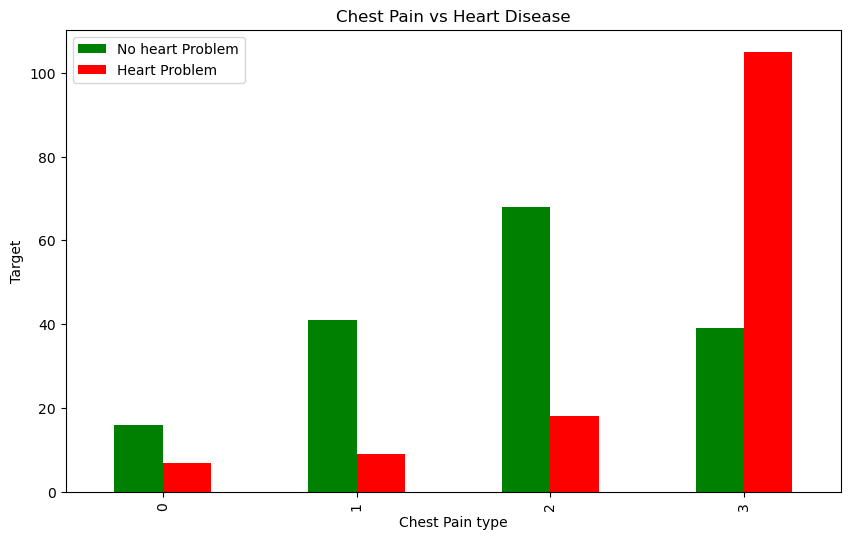

In [45]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(10,6),
                                 color=['green','red'])
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain type')
plt.ylabel('Target');
plt.legend(["No heart Problem","Heart Problem"]);

# Correlation Matrix

In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.122300,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.367911,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.259835,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.126879,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.030438,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.054164,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.019115,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.257980,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.321680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.333925,0.424510


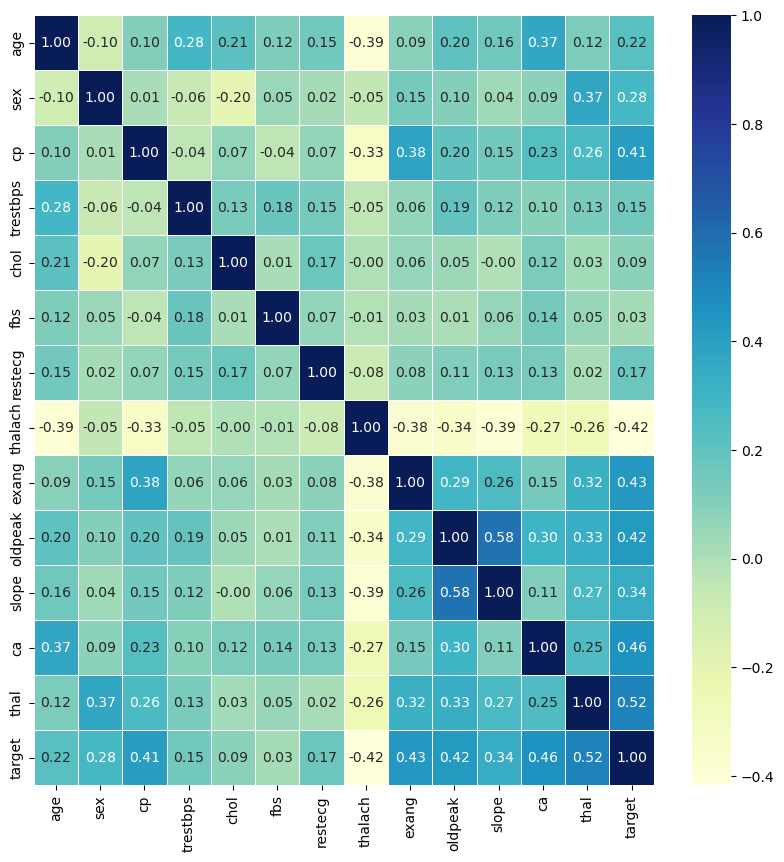

In [17]:
# Draw correlation map
cor_map=df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot=True,
                  linewidths=0.5,
                  fmt="0.2f",
                  cmap="YlGnBu")

In [3]:
# Data Spliting
x = df.drop('target',axis=1)
y = df['target']

In [4]:
np.random.seed(7)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Model used
   * k-Nearest Neighbours Classifier
   * Random Forest Classifier
   * Logistic Regression

In [27]:
# Putting models into dictionary
models = {"KNN":KNeighborsClassifier(),
         "RFC":RandomForestClassifier(),
         "LR":LogisticRegression()}
# Create Function to Evaluate the model
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    # Make a dictionary to score the model
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(x_train,y_train)
        # Evaluate the model and append it score
        model_score[name] = model.score(x_test,y_test)
    return model_score        

In [28]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

E:\Data Science\cardio_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6721311475409836,
 'RFC': 0.7540983606557377,
 'LR': 0.8032786885245902}

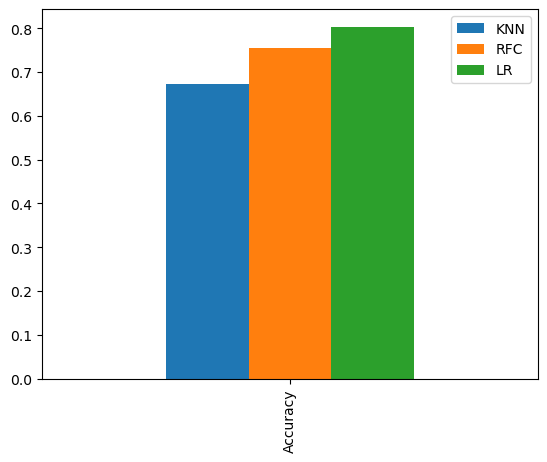

In [29]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.plot.bar();

In [5]:
# 
train_score = []
test_score = []
# Create range to be test for n_neighbors
nneighbours = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()
# Looping through the range
for i in nneighbours:
    KNN.set_params(n_neighbors=i)
    # Run the fit for ith value 
    KNN.fit(x_train,y_train)
    # Update the Trsaining score
    train_score.append(KNN.score(x_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(x_test,y_test))



In [6]:
train_score

[1.0,
 0.7644628099173554,
 0.7727272727272727,
 0.7520661157024794,
 0.7603305785123967,
 0.7520661157024794,
 0.7603305785123967,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339,
 0.7272727272727273,
 0.6983471074380165,
 0.6983471074380165,
 0.7024793388429752,
 0.6983471074380165,
 0.6942148760330579,
 0.6818181818181818,
 0.6900826446280992,
 0.6776859504132231,
 0.6818181818181818,
 0.6900826446280992,
 0.6900826446280992,
 0.6735537190082644,
 0.6983471074380165,
 0.6942148760330579,
 0.6818181818181818,
 0.6900826446280992,
 0.6900826446280992,
 0.6900826446280992]

In [7]:
test_score

[0.6065573770491803,
 0.5573770491803278,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.639344262295082,
 0.6885245901639344,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836]

# Plot the accuracy Score

Max KNN Score:75.41%


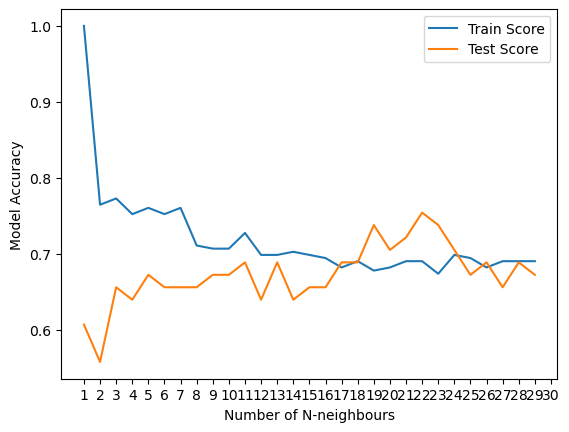

In [11]:
plt.plot(nneighbours,train_score,label= "Train Score")
plt.plot(nneighbours,test_score,label= "Test Score")
plt.xticks(np.arange(1,31,1))
plt.xlabel('Number of N-neighbours')
plt.ylabel('Model Accuracy')
plt.legend()
print(f"Max KNN Score:{max(test_score)*100:0.2f}%")

# Hyperparameter tuning using Randomoized Search CV
 * LogisticRegression()
 * RandomForestClassifier   

In [ ]:
LR_hp = {
    "C":np.logspace(-4,4,20),
    "solver":['liblinear']
}
RFC_hp = {
    "n_estimators": np.arange(10,1600,10),
    "max_depth": [None,3,5,6,10],
    #"min_samples_split":np.arange(2,20,2),
    #"min_samples_leaf":np.arange(1,20,2),
    
}

In [34]:
# Tune logistic Regression
np.random.seed(7)
# Lets use RSCV to tune hp
lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv=5,
                       n_iter=20,
                       verbose=True)
# Fit the random HP Search  model for LR
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
lr.score(x_test,y_test)

0.819672131147541

In [36]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [42]:
# Tune Random Forest Classifier
np.random.seed(7)
# Lets use RSCV to tune hp
rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp,
                       cv=5,
                       n_iter=20,
                       verbose=True)
# Fit the random HP Search  model for LR
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  210,  220,
        230,  240,  250,  260,  270,  280,  29...
        890,  900,  910,  920,  930,  940,  950,  960,  970,  980,  990,
       1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100,
       1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210,
       1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320,
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540,
       1550, 1560, 1570, 1580, 1590])},
                   verbose=True)

In [43]:
rfc.score(x_test,y_test)

0.8032786885245902

In [44]:
rfc.best_params_

{'n_estimators': 360,
 'min_samples_split': 8,
 'min_samples_leaf': 15,
 'max_depth': 6}

* 'KNN': 0.6721311475409836,
* 'RFC': 0.7540983606557377, after Hyperparameter tunning 0.8032786885245902
* 'LR': 0.8032786885245902, after Hyperparameter tunning 0.819672131147541

# Hyperparameter using Grid Search CV

In [8]:
# Tune logistic Regression
np.random.seed(7)
# Lets use RSCV to tune hp
lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp,
                       cv=5,
                       verbose=True)
# Fit the random HP Search  model for LR
lr_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [9]:
lr_gs.score(x_test,y_test)

0.819672131147541

In [10]:
lr_gs.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
# Tune Random Forest Classifier
np.random.seed(7)
# Lets use RSCV to tune hp
rfc_gs = GridSearchCV(RandomForestClassifier(),
                       param_grid=RFC_hp,
                       cv=5,
                       verbose=True)
# Fit the random HP Search  model for LR
rfc_gs.fit(x_train,y_train)

In [ ]:
rfc_gs.score(x_test,y_test)

In [ ]:
rfc_gs.best_params_

# Plotting area under the curve


In [ ]:
y_preds = lr_gs.predict(x_test)
plot_roc_curve(lr_gs,x_test,y_test)

# Confusion Matrix 


In [ ]:
print(confusion_matrix(y_test,y_preds))

In [ ]:
sns.set(font_scale=1.5)
 
def plot_confusion(y_test,y_preds):
    "This is plot the confusion matrix"
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True
                  cbar=False)
plot_confusion(y_test,y_preds)    
    
   

# Classification Report

In [ ]:
print(classification_report(y_test,y_preads))

In [ ]:
lr_gs.best_params_


In [ ]:
lr = LogisticRegression(C=0.615848211066026, 
                        solver= 'liblinear')

In [ ]:
# Cross vallidation accuracy 
cv_accuracy = cross_vaid_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

In [ ]:
# Cross vallidation precision 
cv_precision = cross_vaid_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

In [ ]:
# Cross vallidation recall 
cv_recall = cross_vaid_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# Cross vallidation f1-score 
cv_f1 = cross_vaid_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

# Visualizing the cross validated Matrices


In [ ]:
cv_plot = pd.DataFrame({
    "Accuracy":cv_accuracy,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "f1":cv_f1
    
}index=[0])
cv_plot.T.plot.bar(title="Comparision of the Matrices",
                legend=False);

# Features Improving

In [ ]:
df

In [ ]:
# Check coefficient
lr.fit(x_train,y_train)
lr.coef_

In [ ]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

In [ ]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title="Features Impotance",legend=False);